# Исследование рынка общественного питания в Москве.

- Автор: Забродская Е.А.
- Дата: 01.05.2025

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ рынка заведений общественного питания Москвы для определения характеристик будущего заведения общественного питания.

**Задачи:**
1. Загрузить данные и познакомится с ними
2. Провести предобработку данных
3. Провести исследовательский анализ данных:
    - исследовать данные более подробно;
    - изучить взаимосвязь рейтинга заведений с другими данными
4. Сформулировать выводы.

### Описание данных

Для исследования доступны датасеты с данными по заведениям общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:  
`rest_info.csv` - с информацией о заведениях общественного питания;
`rest_price.csv` - с информацией о среднем чеке в заведениях общественного питания.

**Описание датасета** `rest_info.csv`:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

**Описание датасета** `rest_price.csv`:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
        «Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽» и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
        Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
        Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
        Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта


1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

---

## 1. Загрузка данных и знакомство с ними


Импортируем необходимые библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

!pip install phik
from phik import phik_matrix

Выгрузим данные в переменные.

In [2]:
rest_info = pd.read_csv(...)
price_info = pd.read_csv(...)

Выведем информацию о датасетах и их первые строки.

In [3]:
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [4]:
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
price_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Выведем уникальные значения столбца `chain`.

In [6]:
rest_info['chain'].unique().tolist()

[0, 1]

Столбец `chain` содержит только значения "0" и "1".

In [7]:
price_info.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод


Датасет `rest_info` содержит 8406 строк и 9 столбцов, в которых представлена информация о заведениях общественного питания.\
В столбцах `hours`, `seats` встречаются пропуски. Можно проверить и другие столбцы на предмет наличия значений-индикаторов, заменяющих пропуски.

6 столбцов имеют тип данных `object`:\
    столбцы `id`, `name`, `adress`, `hours`, `category`, `district` содержат текстовые данные и тип `object` для них подходит;\
    
2 столбца имеют тип данный `float64`:\
    столбец `rating` содержит дробные числа и тип данных `float64` подходит;\
    столбец `seats` содержит целочисленные данные. Однако, чтобы поменять тип данных на целочисленный нужно заполнить пропуски. Это приведет к необходимости исключать большое количество строк из корреляционной матрицы. Поэтому лучше оставить пропуски и не менять тип данных.\
    
1 столбец имеет тип данных `int64`:\
столбец `chain` содержит всего два значения: 0 и 1. Поэтому его размерность можно оптимизировать.\

Названия столбцов содержат только буквы в нижнем регистре. Изменять названия столбцов не требуется.\

Значения в столбцах соответствуют описанию.

Датасет `price_info` содержит 4058 строк и 5 столбцов, в которых содержится информация о среднем чеке в заведениях общественного питания.\
Пропуски есть в 4-х столбцах. В столбце `avg_bill`данные видимо не были заполнены пользователями. В столбцах `middle_avg_bill`и `middle_coffee_cup` пропуски должны быть (из-за способа их заполнения).\
2 столбца имеют тип данных `float64`:\
    столбцы `middle_avg_bill`, `middle_coffee_cup` могут содержать дробные значения значения, поэтому можно оставить тип данных `float64`.\
3 столбца имеют тип данных `object`:\
    столбцы `id`, `avg_bill`, `price` содержат текстовые данные и тип `object` для них подходит;
    
Названия столбцов даны в стиле snake case и изменять из не требуется.

Значения в столбцах соответствуют описанию.

### Подготовка единого датафрейма


Объединим два датасета в один на основе столбца `id` и выведим первые 5 строк объединенного датафрейма.

In [8]:
df = rest_info.merge(price_info, on = 'id', how='left')
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Проверим размерность объединенного датасета.

In [9]:
df.shape

(8406, 13)

Объединенный датасет содержит 8406 строк и 13 столбцов. Ничего не потерялось.

## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

### 2.1 Корректировка типов данных

Оптимизируем размерность столбца `chain`.

In [10]:
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

Проверим типы данных.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB


Размерность оптимизирована.

### 2.2 Проверка наличия пропусков в данных

In [12]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
round(df.isna().mean() *100, 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

В столбце `hours` 536 пропусков (6,38%). Информация о часах работы заведения могла быть не внесена владельцами заведений. Так как таких строк больше 5%, то удалять их не нужно. Чтобы можно было осуществить поиск заведений, работающих круглосуточно пропуски нужно заполнить значением индикатором "-".\
В столбце `seats` 3611 пропусков (42,96%). Лучше оставить пропуски как есть, не заполняя их значениями индикаторами. Так как иначе придется убрать большое количество строк при построении матрицы корреляции.\
В столбце `price` 5091 пропуск (60,56%). Так как таких строк очень много удалить их нельзя. Пропуски лучше оставить, чтобы не искажались данные. \
В столбце `avg_bill`4590 пропусков (54,6%). Возможно для данных заведений не вносили комментарии по средним ценам. Таких строк очень много, поэтому удалять их нельзя. Данный столбец содержит текстовые данные в произвольной форме, поэтому заполнить пропуски значениями по смыслу также нельзя. \
В столбце `middle_avg_bill` 5257 пропусков (62,54%). Данный столбец формируется исходя из информации в столбце `avg_bill`, в котором много пропусков. Кроме того, он заполняется только если значение в столбце `avg_bill` начинается с подстроки «Средний счёт». Удалить строки с пропусками нельзя, так как их очень много. Пропуски лучше оставить, чтобы не искажались данные.\
В столбце `middle_coffee_cup` 7871 пропуск (93,64%). Пропуски в данном столбце связаны с тем, что он формируется исходя из информации в столбце `avg_bill`, в котором много пропусков. Кроме того, он заполняется только если значение в столбце `avg_bill`  начинается с подстроки «Цена одной чашки капучино». Пропуски лучше оставить, чтобы не искажались данные.

Посмотрим, есть ли строки в которых значением столбца `hours` является прочерк ("-").

In [14]:
df[df['hours'] == '-']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup


Таких строк нет. Можно заполнить пропуски в столбце `hours` значением-индикатором "-".

In [15]:
df['hours'] = df['hours'].fillna('-')

Посчитаем количество пропусков в данных.

In [16]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

### 2.3 Проверка данных на явные и неявные дубликаты.

Выведем уникальные значения столбца `category`.

In [17]:
sorted(df['category'].unique().tolist())

['бар,паб',
 'булочная',
 'быстрое питание',
 'кафе',
 'кофейня',
 'пиццерия',
 'ресторан',
 'столовая']

Повторяющихся значений в столбце `category` нет.

Выведем уникальные значения столбца `district`.

In [18]:
sorted(df['district'].unique().tolist())

['Восточный административный округ',
 'Западный административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Центральный административный округ',
 'Юго-Восточный административный округ',
 'Юго-Западный административный округ',
 'Южный административный округ']

Повторяющихся значений в столбце `district` нет.

Для проверки на дубликаты приведем данные в столбцах `name`, `address` к нижнему регистру.

In [19]:
for column in ['name', 'address']:
    df[column] = df[column].str.lower()

In [20]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


Проверим данные на явные дубликаты.

In [21]:
df.duplicated().sum()

0

Явных дубликатов в данных нет.

Проверим, что в столбце `id` все значения уникальны.

In [22]:
df.duplicated(subset='id').sum()

0

Все значения в столбце `id` уникальны.

Проверим на уникальность значения в столбцах `name` и `address`.

In [23]:
df.duplicated(subset='name').sum()

2894

In [24]:
df.duplicated(subset='address').sum()

2654

В столбцах `name` и `address` достаточно много повторяющихся значений. Однако, названия заведений могут повторяться и по одному адресу может находится несколько заведений. Проверим, есть ли повторяющиеся сочетания названия и адреса заведения.

In [25]:
df.duplicated(subset=['name', 'address']).sum()

4

Выведем строки с повторяющися сочетанием названия и адреса заведения.

In [26]:
df[df.duplicated(subset=['name', 'address'], keep=False) == 1]


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,-,4.1,0,276.0,NaN,NaN,NaN,NaN


Для повторяющихся сочетаний названия и адреса заведения:
- для первой пары (`name` - "кафе"): вторая строчка отличается только часами работы - ее можно удалить(для проведения анализа часы работы заведений не нужны (кроме тех заведений, которые работают круглосуточно)).\
- для второй пары (`name` - "more poke"): вторая строчка отличается часами работы и признак сетевое/несетевое заведение. Чтобы выбрать какую строку удалить, нужно определить, является ли заведение сетевым.\
- для третьей пары (`name` - "раковарня клешни и хвосты") отличается ли категория заведения, часы работы и признак сетевое/несетевое заведение. Чтобы определить можно ли удалить какую-то из двух строк нужно определить является ли заведение сетевым или нет, а также правильную категорию.\
- для четвертой пары дубликатов (`name` - "хлеб да выпечка") отличаются категория заведения, часы работы и признак сетевое/несетевое заведение. Чтобы определить какую строчку можно удалить, нужно определить правильную категорию и является ли заведение сетевым.

Выведем строки со значением столбца `name` "more poke".

In [27]:
df[df['name'] == 'more poke']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
6088,1cd73aca53414d65a7744da3d1c93832,more poke,ресторан,"москва, духовской переулок, 19",Южный административный округ,"ежедневно, 10:00–22:00",4.4,1,NaN,NaN,NaN,NaN,NaN


В двух строчках из трех в столбце `chain` стоит значение "1". Лучше удалить дублирующуюся строку, в которой в столбце `chain` стоит значение "0".

Выведем строки со значением столбца `name` "раковарня клешни и хвосты".

In [28]:
df[df['name'] == 'раковарня клешни и хвосты']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
7270,f2e3eb711fe040c3a2c03e18a6783b05,раковарня клешни и хвосты,"бар,паб","москва, братиславская улица, 12",Юго-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.9,1,40.0,средние,Цена бокала пива:150–250 ₽,NaN,NaN


В двух строчках из трех в столбце `chain` стоит значение "1" и категория заведения "бар,паб". Лучше удалить дублирующуюся строку, в которой в столбце `chain` стоит значение "0" и категория заведения "ресторан".

Выведем строки со значением столбца `name` "раковарня клешни и хвосты".

In [29]:
df[df['name'] == 'хлеб да выпечка']

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,-,4.1,0,276.0,NaN,NaN,NaN,NaN
7937,d1bb31bf8e1b45f8a2db20182836e3ac,хлеб да выпечка,кофейня,"москва, каширское шоссе, 61г",Южный административный округ,"ежедневно, 09:00–22:00",4.5,1,NaN,NaN,NaN,NaN,NaN


В двух строчках из трех в столбце `chain` стоит значение "1". Лучше удалить дублирующуюся строку, в которой в столбце `chain` стоит значение "0".

In [30]:
print(f'Количество строк до удаления дубликатов {df.shape[0]}')
df = df.drop([215, 1430, 2212, 3109], inplace=False)
print(f'Количество строк после удаления дубликатов {df.shape[0]}')

Количество строк до удаления дубликатов 8406
Количество строк после удаления дубликатов 8402


Неявные дубликаты удалены.

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

Создадим столбец `is_24_7`, содержащий `True`, если заведение работает ежедневно и круглосуточно и `False` - в противоположном случае. Для этого найдем все уникальные значения столбца `hours`, которые содержат слова "ежедневно" и "круглосуточно" одновременно.

In [31]:
df[df['hours'].str.contains('ежедневно') &  df['hours'].str.contains('круглосуточно')]['hours'].unique().tolist()

['ежедневно, круглосуточно']

In [32]:
def is_24_7(x):
    if x:
        return 1
    return 0

df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно').apply(is_24_7)

In [33]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,0
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0


Cтолбец `is_24_7` создан.

Выведем значения столбца `is_24_7` для заведений, работающих круглосуточно.

In [34]:
df.loc[df['hours'].str.contains('ежедневно, круглосуточно')]['is_24_7']

10      1
17      1
19      1
24      1
49      1
       ..
8394    1
8399    1
8403    1
8404    1
8405    1
Name: is_24_7, Length: 730, dtype: int64

Столбец, содержащий показатель для заведений, работающих круглосуточно, создан.

Для удобства изучения распределения данных по административным округам создадим дополнительных столбец с сокращенными названиями округов.

In [35]:
df['district_abb'] = df['district'].replace({'Восточный административный округ': 'ВАО',
 'Западный административный округ': 'ЗАО',
 'Северный административный округ': 'САО',
 'Северо-Восточный административный округ': 'СВАО',
 'Северо-Западный административный округ': 'СЗАО',
 'Центральный административный округ': 'ЦАО',
 'Юго-Восточный административный округ': 'ЮВАО',
 'Юго-Западный административный округ': 'ЮЗАО',
 'Южный административный округ': 'ЮАО'})

In [36]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,district_abb
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,0,САО
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,САО
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,САО
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,САО
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0,САО


Столбец с сокращенными названиями округов создан.

---

### Промежуточный вывод


В результате предобработки были выполнены следующие действия:
- Изучены пропуски в данных. Пропуски в столбце `seats` оставлены как есть. Пропуски в столбце `hours` были заполнены значением-индикатором "-". Пропуски в столбце `price`, `middle_avg_bill`, `middle_coffee_cup`  были оставлены без изменений.
- Явные дубликаты в данных обнаружены не были. 
- Было обнаружены неявные дубликаты для 4-х строк. Дублирующие строки были удалены. Количество строк датафрейма после удаления дубликатов - 8402. 
- Создан столбец `is_24_7`, содержащий значение "1", если заведение работает круглосуточно, и "0" в других случаях. 
- Создан дополнительный столбец `district_abb`, содержащий аббревиатуры административных округов.

## 3. Исследовательский анализ данных


---

### Категории заведений.


Проверим распределение данных по значениям столбца `category`.

In [37]:
df['category'].value_counts()

кафе               2376
ресторан           2041
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Построим столбчатую диаграмму с распределением количества заведений по значениям столбца `category`.

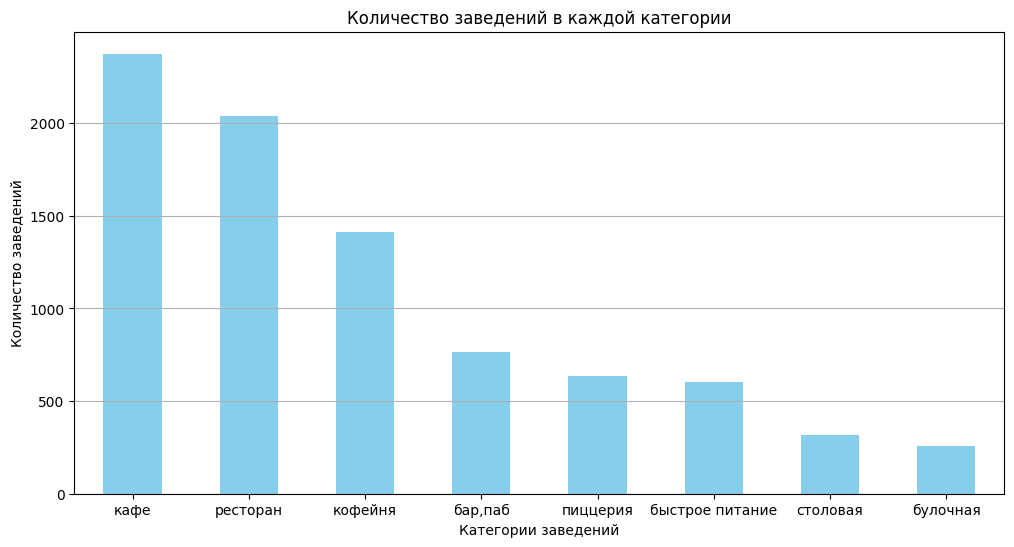

In [38]:
plt.figure(figsize=(12, 6))

df['category'].value_counts().plot(kind='bar',
                                          legend=False,
                                          rot=0,
                                          color='skyblue'
                                          )                                           

plt.grid(axis='y')
plt.title('Количество заведений в каждой категории')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')

plt.show()

Самые распространенные категории - "кафе" (2376), "ресторан" (2041), "кофейня" (1413). В остальных категориях количество заведений значительно меньше (256-765). Больше всего заведений имеют категорию "кафе".

---

### Административные округа.


Изучим распределение количества заведений по административным районам Москвы.

In [39]:
df['district_abb'].value_counts()

ЦАО     2241
САО      898
ЮАО      892
СВАО     891
ЗАО      850
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: district_abb, dtype: int64

Визуализируем распределение по значениям столбца `district_abb`.

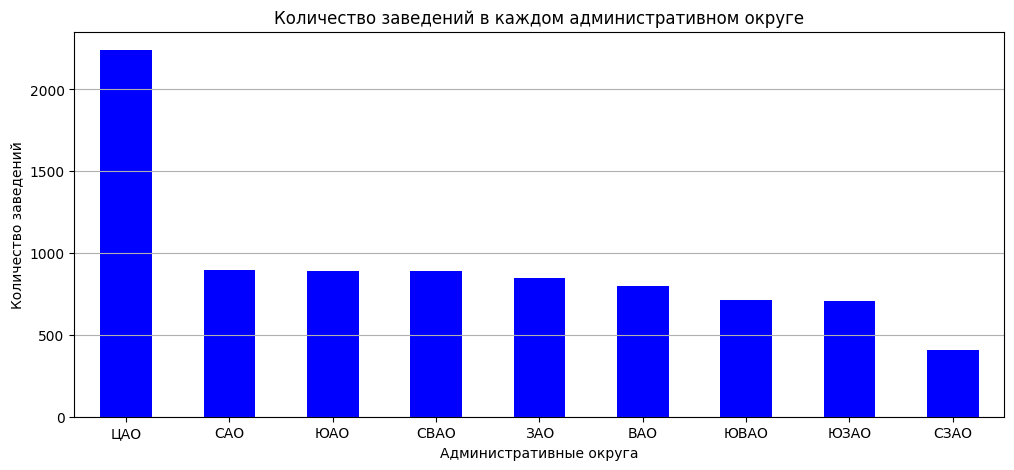

In [40]:
plt.figure(figsize=(12, 5))

df['district_abb'].value_counts().plot(kind='bar',
                                          legend=False,
                                          rot=0,
                                          color='blue',
                                          )                                           

plt.grid(axis='y')
plt.title('Количество заведений в каждом административном округе')
plt.xlabel('Административные округа')
plt.ylabel('Количество заведений')

plt.show()

Больше всего заведений общественного питания расположено в Центральном административном округе (2241). Меньше всего в Северо-Западном административном округе (409). Для остальных округов количества заведений общественного питания близки по значениям (709-898).

Раcсчитаем и визуализируем процент заведений в каждом округе от общего количества заведений в Москве.

In [41]:
round(df['district_abb'].value_counts() / df.shape[0] * 100, 2)

ЦАО     26.67
САО     10.69
ЮАО     10.62
СВАО    10.60
ЗАО     10.12
ВАО      9.50
ЮВАО     8.50
ЮЗАО     8.44
СЗАО     4.87
Name: district_abb, dtype: float64

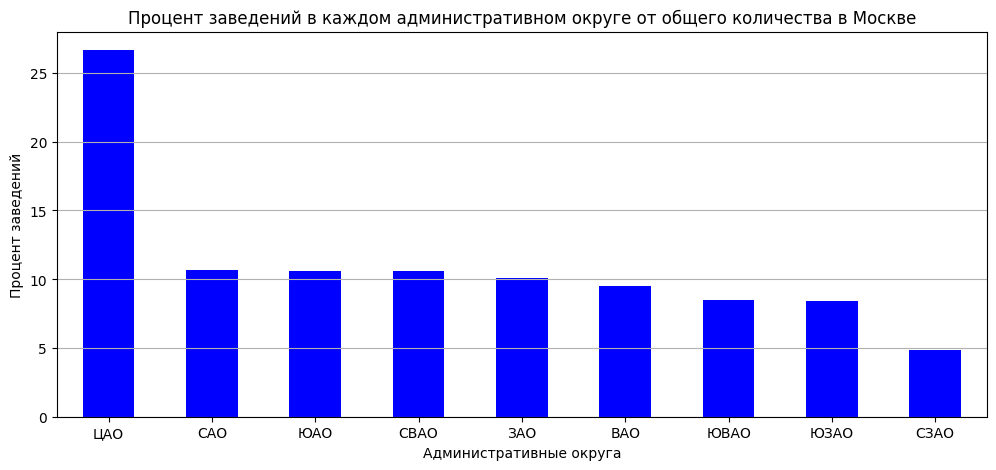

In [42]:
plt.figure(figsize=(12, 5))

round(df['district_abb'].value_counts() / df.shape[0] * 100, 2).plot(kind='bar',
                                                                    legend=False,
                                                                    rot=0,
                                                                    color='blue',
)                                           

plt.grid(axis='y')
plt.title('Процент заведений в каждом административном округе от общего количества в Москве')
plt.xlabel('Административные округа')
plt.ylabel('Процент заведений')

plt.show()

Больше четверти всех заведений общественного питания находятся в Центральном административном округе.

Изучим распределение заведений по категориям в Центральном административном округе Москвы.

In [43]:
df[df['district_abb'] == 'ЦАО']['category'].value_counts()

ресторан           669
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

Визуализируем распределение заведений общественного питания по категориям в Центральном административном округе.

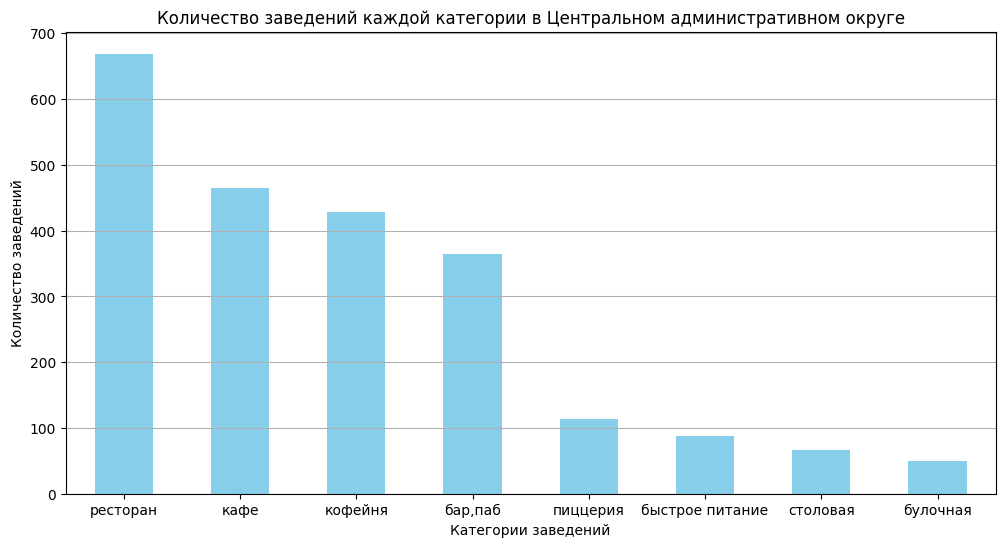

In [44]:
plt.figure(figsize=(12, 6))

df[df['district_abb'] == 'ЦАО']['category'].value_counts().plot(kind='bar',
                                          legend=False,
                                          rot=0,
                                          color='skyblue'
                                          )                                           

plt.grid(axis='y')
plt.title('Количество заведений каждой категории в Центральном административном округе')
plt.xlabel('Категории заведений')
plt.ylabel('Количество заведений')

plt.show()

Сравним доли заведений каждой категории от общего количества заведений в Москве в целом и в Центральном административном округе.

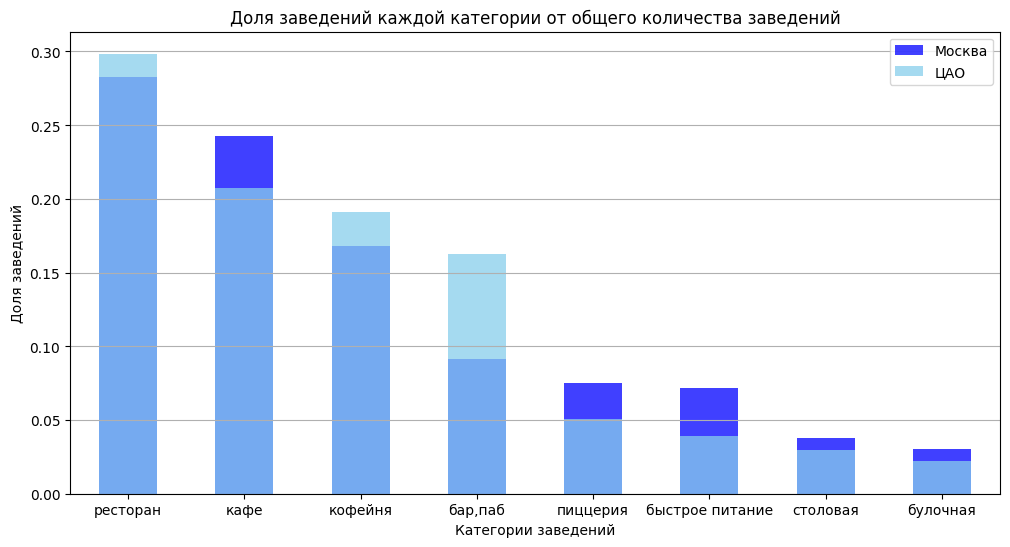

In [45]:
plt.figure(figsize=(12, 6))

(df['category'].value_counts() / df.shape[0]).plot(kind='bar',
                                          legend=True,
                                          rot=0,
                                          color='blue',
                                          alpha=0.75
                                          )

(df[df['district_abb'] == 'ЦАО']['category'].value_counts() / df[df['district_abb'] == 'ЦАО'].shape[0]).plot(kind='bar',
                                          legend=True,
                                          rot=0,
                                          color='skyblue',
                                          alpha=0.75                                                                 
                                          )


plt.grid(axis='y')
plt.title('Доля заведений каждой категории от общего количества заведений')
plt.xlabel('Категории заведений')
plt.ylabel('Доля заведений')
plt.legend(['Москва', 'ЦАО'])

plt.show()

По диаграмме видно, что доля ресторанов в Центральном административном округе больше, чем в целом по Москве. Доля кофеен также несколько выше в ЦАО по сравнению с их долей среди всех заведений Москвы, а доля кафе наоборот меньше в ЦАО, чем в Москве в целом. Сильно больше доля баров/пабов в ЦАО по сравнению с их долей в Москве в целом. Доли заведений остальных категорий в ЦАО меньше, чем в целом по Москве. При это для категорий "пиццерия" и "быстрое питание" разница больше, чем для заведений категорий "столовая" и "булочная". 

---

### Сетевые/несетевые заведения.


Изучим соотношение сетевых и несетевых заведений.

In [46]:
df['chain'].value_counts()

0    5197
1    3205
Name: chain, dtype: int64

Несетевых заведений 5197, сетевых - 3205. Визуализируем соотношение сетевых и несетевых заведений.

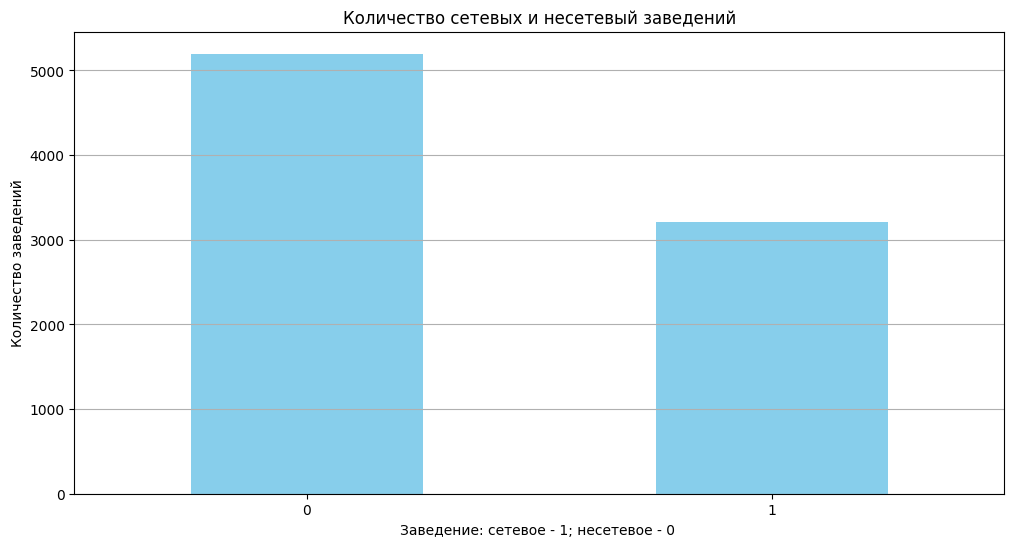

In [47]:
plt.figure(figsize=(12, 6))

df['chain'].value_counts().plot(kind='bar',
                                legend=False,
                                rot=0,
                                color='skyblue'
)                                           

plt.grid(axis='y')
plt.title('Количество сетевых и несетевый заведений')
plt.xlabel('Заведение: сетевое - 1; несетевое - 0 ')
plt.ylabel('Количество заведений')

plt.show()

Посчитаем доли сетевых и несетевых заведений и визуализируем их.

In [48]:
round(df['chain'].value_counts(normalize=True), 2)

0    0.62
1    0.38
Name: chain, dtype: float64

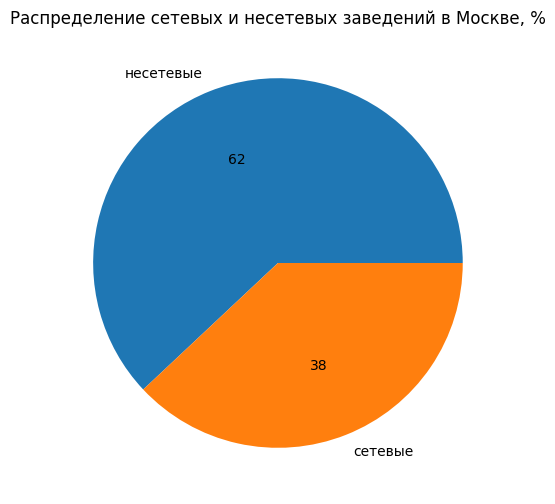

In [49]:
plt.figure(figsize=(12, 6))

df_chain = round(df['chain'].value_counts(normalize=True), 2)

plt.pie(df_chain, labels=['несетевые', 'сетевые'], autopct='%.f')

plt.title('Распределение сетевых и несетевых заведений в Москве, %')

plt.show()

62% заведений в Москве несетевые.

Изучим долю сетевых заведений для каждой категории заведений. 

In [50]:
round(df.groupby('category')['chain'].sum() / df.groupby('category')['chain'].count(), 2).sort_values(ascending=False)

category
булочная           0.61
пиццерия           0.52
кофейня            0.51
быстрое питание    0.38
ресторан           0.36
кафе               0.33
столовая           0.28
бар,паб            0.22
Name: chain, dtype: float64

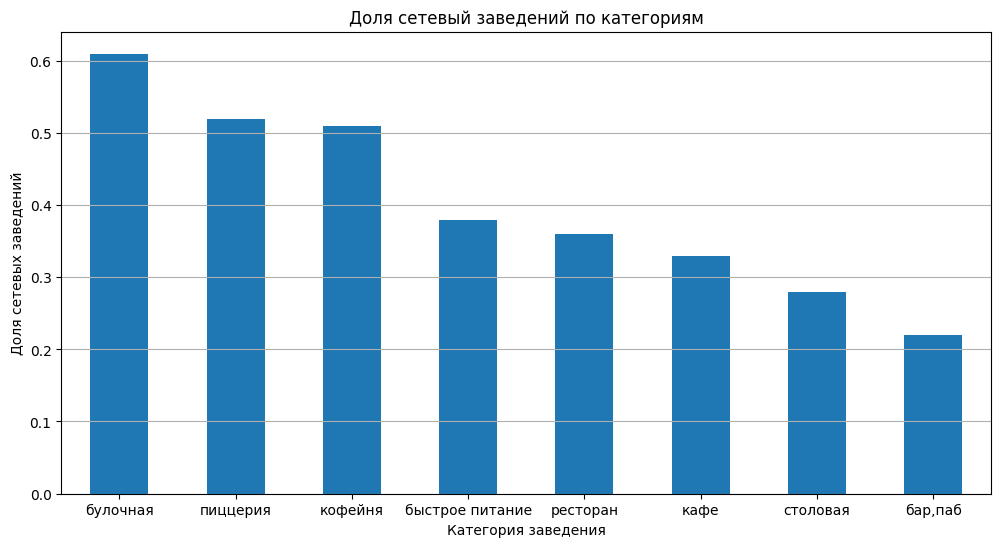

In [51]:
df_ch = round(df.groupby('category')['chain'].sum() / df.groupby('category')['chain'].count(), 2).sort_values(ascending=False)
df_ch.plot(kind='bar',
           legend=False,
           rot=0,
           figsize=(12,6)
)                                           

plt.grid(axis='y')
plt.title('Доля сетевый заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')


plt.show()

Самая высокая доля сетевых заведений в категории "булочная". Также высокая доля сетевых заведений в категориях "пиццерия" и "кофейня". Самая низкая доля сетевых заведений в категории "бар,паб".

---

### Вместимость заведений


Изучим распределение значений в столбце `seats`.

In [52]:
print('Статистические показатели столбца seats')
df['seats'].describe()

Статистические показатели столбца seats


count    4792.000000
mean      108.382304
std       122.839708
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее значение (108,38) сильно больше, чем медианное (75). Стандартное отклонение очень большое (122,84). Возможно это свидетельствует о наличии аномальных значений. Максимальное значение 1288 посадочных мест возможно является аномальными. Построим гистограмму распределения значений и диаграмму размаха.

Text(0.5, 0, 'Количество посадочных мест в заведении')

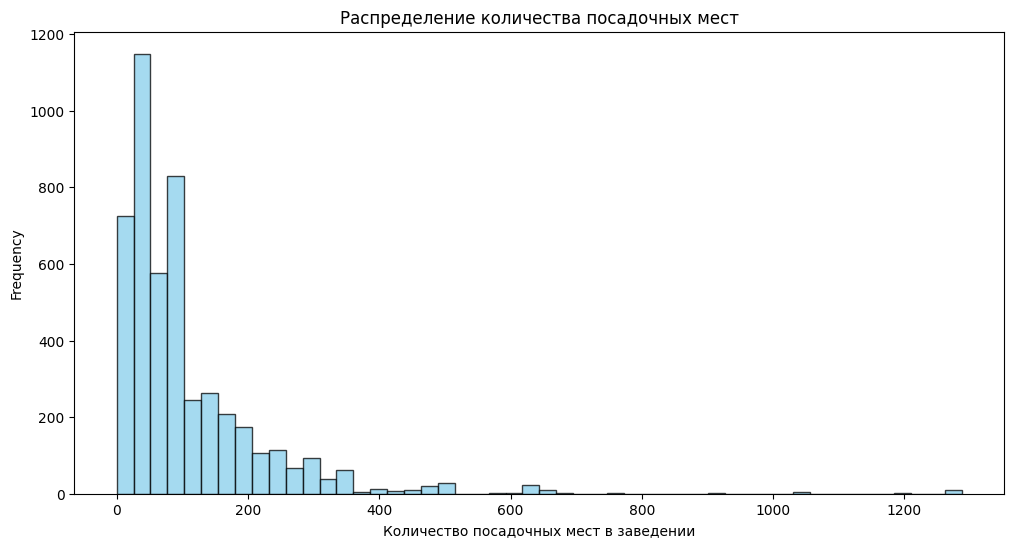

In [53]:
plt.figure(figsize=(12,6))

df['seats'].plot(kind='hist',
                 bins=50,
                 color='skyblue',
                 edgecolor='black',
                 alpha=0.75,
                 rot=0)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест в заведении')

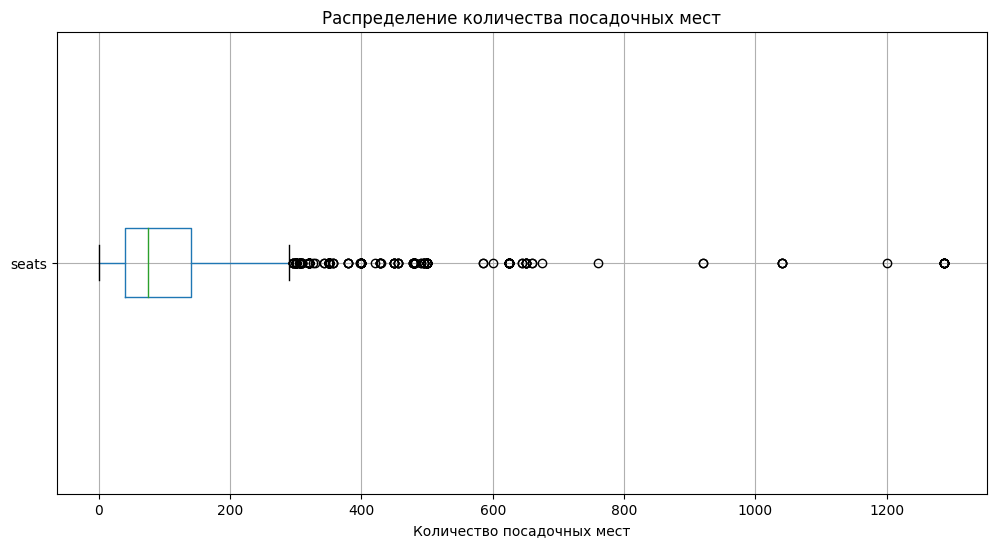

In [54]:
plt.figure(figsize=(12,6))

df.boxplot(column='seats',
           vert=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

Гистограмма правоассиметричного распределения с длинным хвостом. По диаграмме рассеяния также видно, что основные значения количества посадочных мест в заведениях лежат в области значений меньше 300. Скорее всего значения больше 300 являются выбросами. Возможно они возникли при заполнении пропусков значениями-индикаторами, так как количество мест в ресторане больше 300 нереалистично. Посмотрим сколько таких значений.

In [55]:
df[df['seats'] > 300].shape[0]

251

In [56]:
round(df[df['seats'] > 300].shape[0] / df.shape[0] *100, 2)

2.99

Значений больше 350 посадочных мест в заведении 251. Это 2,99 % от всех значений столбца `seats`. Можно ограничить датасет значением в столбце `seats` меньшим 300. Изучим распределение значений в столбце seats без выбросов.

In [57]:
df[df['seats'] < 300]['seats'].describe()

count    4479.000000
mean       84.779638
std        66.130077
min         0.000000
25%        40.000000
50%        70.000000
75%       119.000000
max       295.000000
Name: seats, dtype: float64

Максимальное значение количества посадочных мест теперь 295, минимальное 0. Среднее значение (84,78) по прежнему больше медианного (70), хотя уже не так сильно. Стандартное отклонение достаточно большое (66,13). Но это возможно, так как разница в количестве посадочных мест между маленькой кофейней и большим рестораном может быть велика.

Text(0.5, 0, 'Количество посадочных мест в заведении')

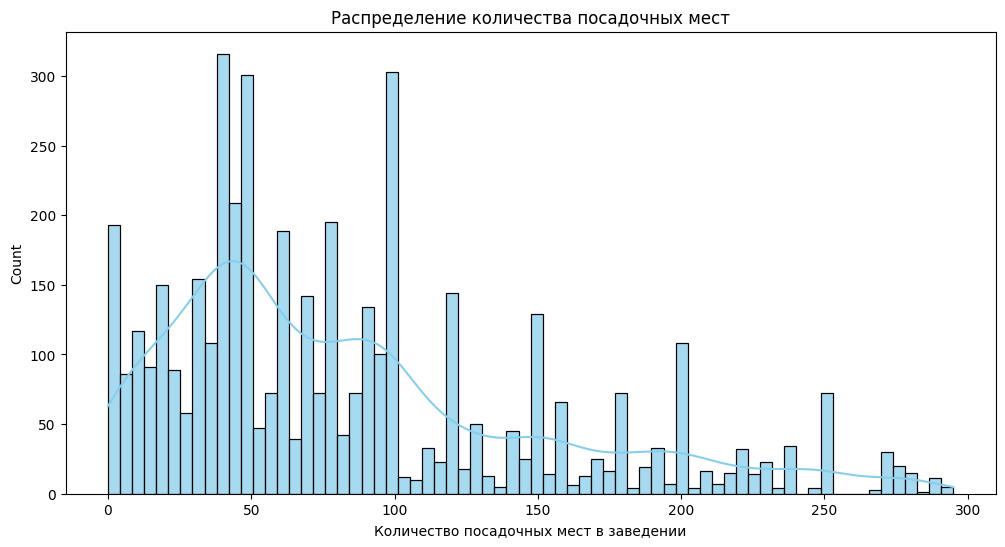

In [58]:
plt.figure(figsize=(12,6))

df_seats = df[df['seats'] < 300]
sns.histplot(data = df_seats,
             x='seats',
             bins=70,
             color='skyblue',
             edgecolor='black',
             alpha=0.75,
             kde=True
)


plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест в заведении')

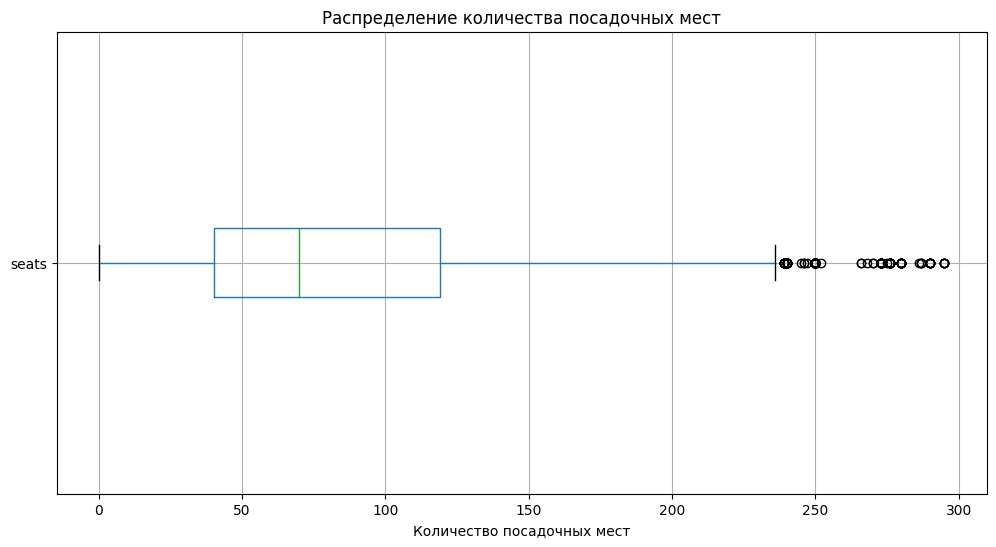

In [59]:
plt.figure(figsize=(12,6))

df[df['seats'] < 300].boxplot(column='seats',
                    vert=False)

plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

plt.show()

Гистограмма имеет правоассиметричное распределение. Основное количество заведений имеет количество мест меньше 120. Значения, частота которых максимальна, лежат в диапазоне 30-50 посадочных мест. Необходимо исследовать причины возникновения регулярных пиковых значений. 

Посчитаем среднее количество мест для каждой категории заведений.

In [60]:
round(df[df['seats'] < 300].groupby('category')['seats'].mean(), 2).sort_values()

category
кафе               76.06
булочная           76.66
пиццерия           76.84
столовая           78.55
быстрое питание    81.81
кофейня            85.74
бар,паб            88.97
ресторан           96.61
Name: seats, dtype: float64

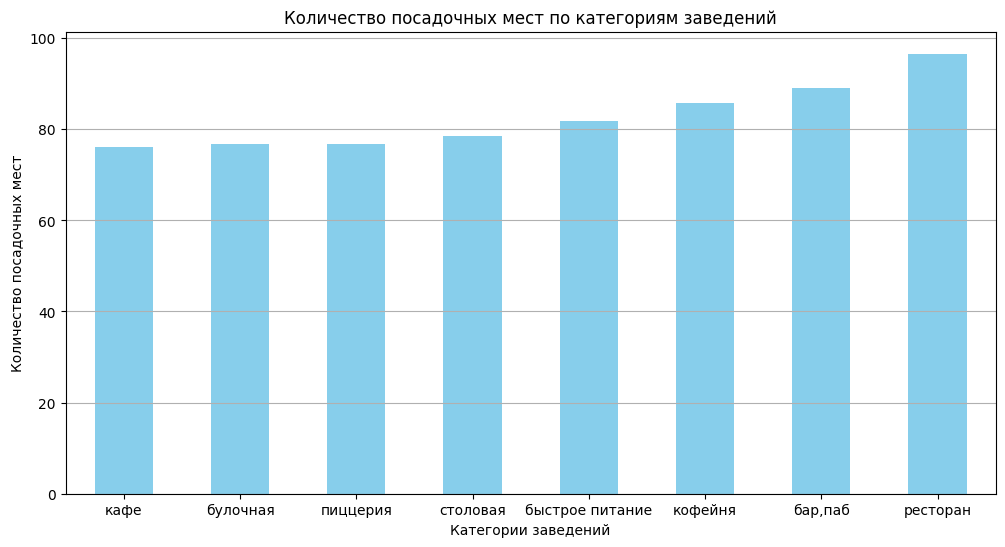

In [61]:
df_seats = round(df[df['seats'] < 300].groupby('category')['seats'].mean(), 2).sort_values()

plt.figure(figsize=(12, 6))

df_seats.plot(kind='bar',
              legend=False,
              rot=0,
              color='skyblue'
)                                           

plt.grid(axis='y')
plt.title('Количество посадочных мест по категориям заведений')
plt.xlabel('Категории заведений')
plt.ylabel('Количество посадочных мест')

plt.show()

Наибольшее среднее количество посадочных мест у категории "ресторан".

Распределение количества посадочных мест в каждой категории заведения общественного питания


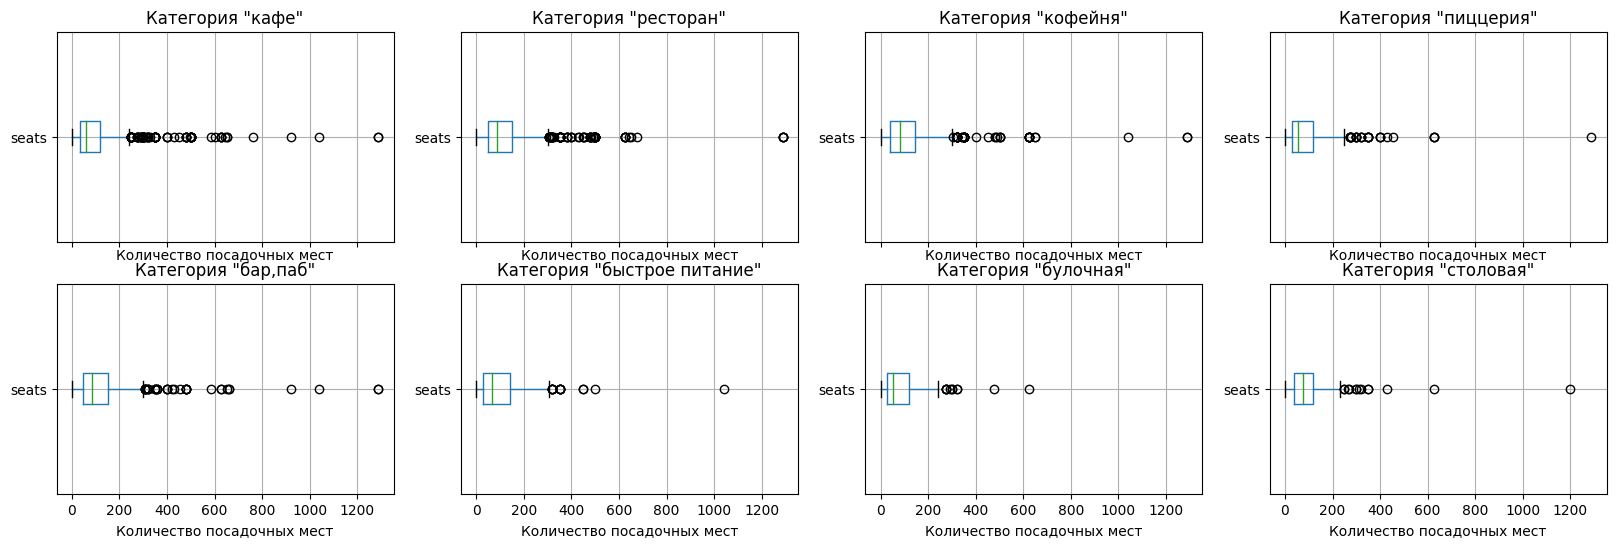

In [62]:
print('Распределение количества посадочных мест в каждой категории заведения общественного питания')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 6), sharex=True)
axes = axes.flatten()

for index, item in enumerate(df['category'].unique().tolist()):
    df_seats_cat = df[df['category'] == item]
    df_seats_cat.boxplot(column='seats',
                         vert=False,
                         ax=axes[index])
    
    axes[index].set_xlabel('Количество посадочных мест')
    axes[index].set_title(f'Категория "{item}"')

Во всех категориях заведений есть аномальные значения. Ограничим значение в столбце `seats`.

Распределение количества посадочных мест в каждой категории заведения общественного питания


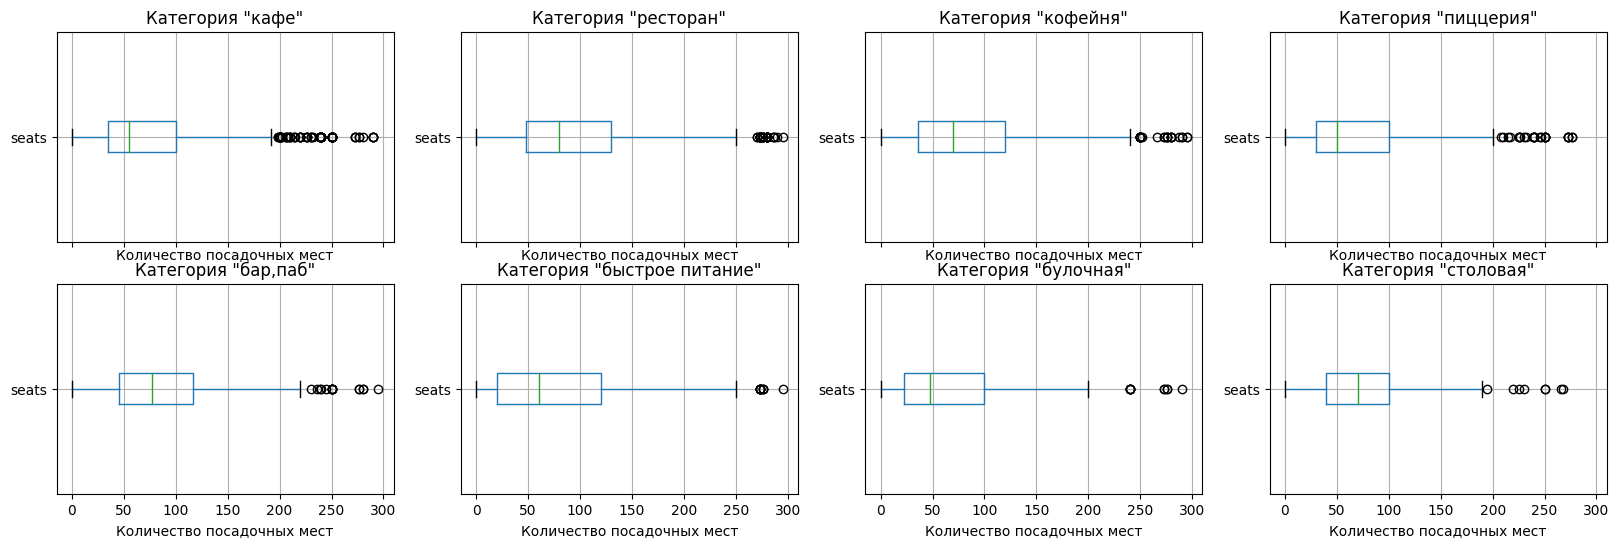

In [63]:
print('Распределение количества посадочных мест в каждой категории заведения общественного питания')
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 6), sharex=True)
axes = axes.flatten()

for index, item in enumerate(df['category'].unique().tolist()):
    df_seats_cat = df[(df['category'] == item) & (df['seats'] < 300)]
    df_seats_cat.boxplot(column='seats',
                         vert=False,
                         ax=axes[index])
    
    axes[index].set_xlabel('Количество посадочных мест')
    axes[index].set_title(f'Категория "{item}"')

75% заведений имеет количество мест менее (примерно):
130 - "ресторан";
120 - "кофейня";
120 - "быстрое питание";
115 - "бар,паб";
100 - "кафе";
100 - "пиццерия";
100 - "булочная";
100 - "столовая".

Text(0, 0.5, 'Количество посадочных мест')

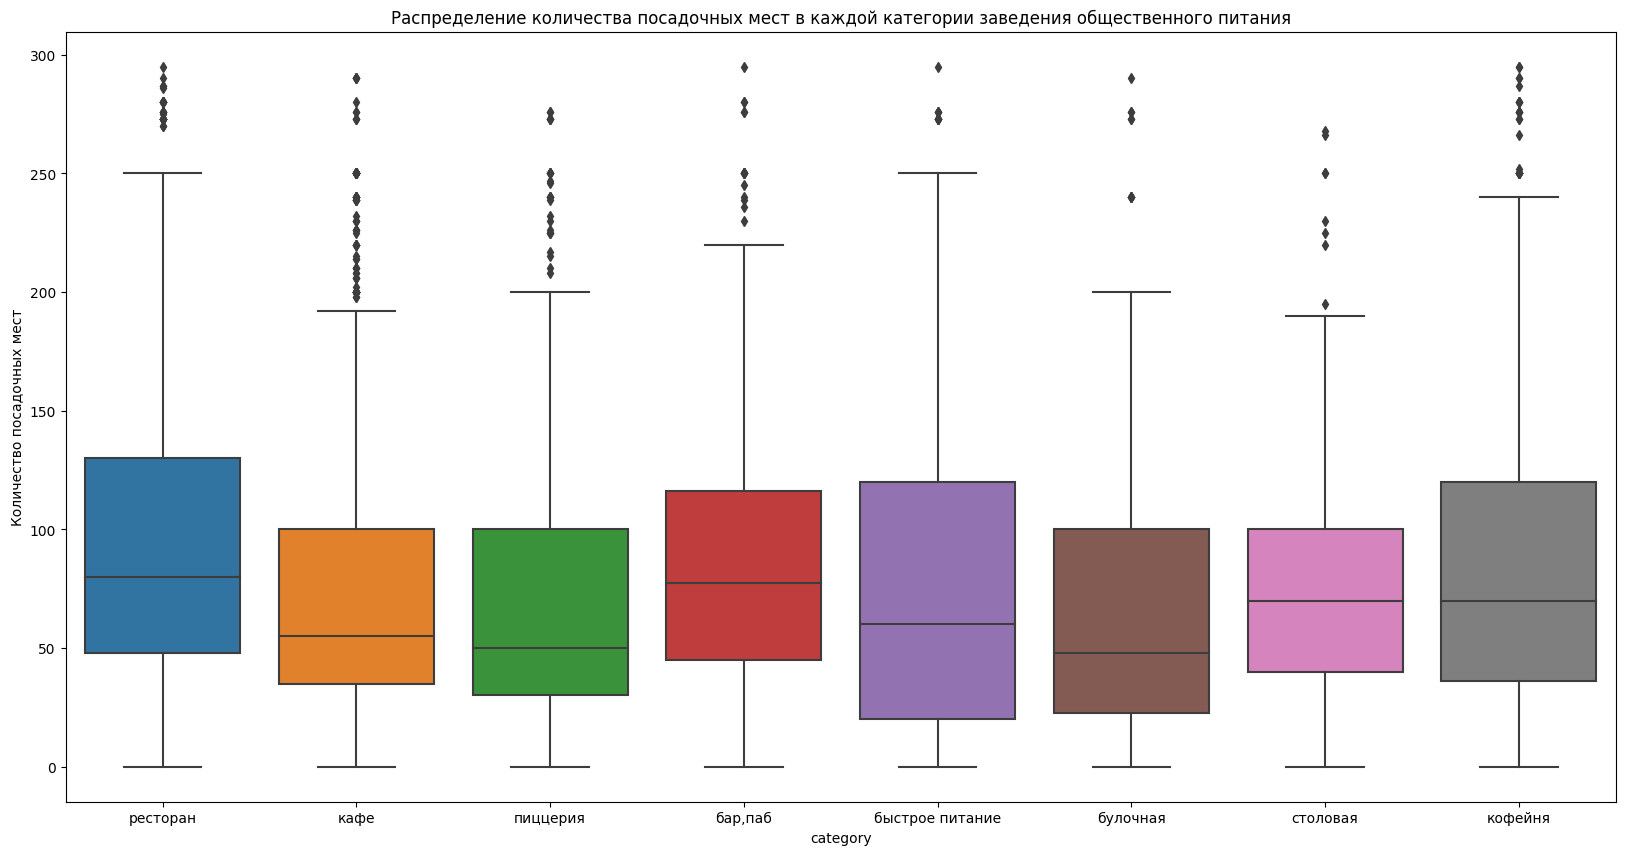

In [64]:
plt.figure(figsize=(20, 10))

sns.boxplot(x='category', y='seats', data=df[df['seats'] < 300])

plt.title('Распределение количества посадочных мест в каждой категории заведения общественного питания')
plt.ylabel('Количество посадочных мест')

Значения количества посадочных мест кажутся завышенными. Особенно для категорий "булочная", "кофейня", Возможно, что для сетей указывали количество мест для всех заведений сети. 

---

### Рейтинг.


Посчитаем средние рейтинги по категориям заведений.

In [65]:
round(df.groupby('category')['rating'].mean(), 2).sort_values(ascending=False)

category
бар,паб            4.39
пиццерия           4.30
ресторан           4.29
кофейня            4.28
булочная           4.27
столовая           4.21
кафе               4.12
быстрое питание    4.05
Name: rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

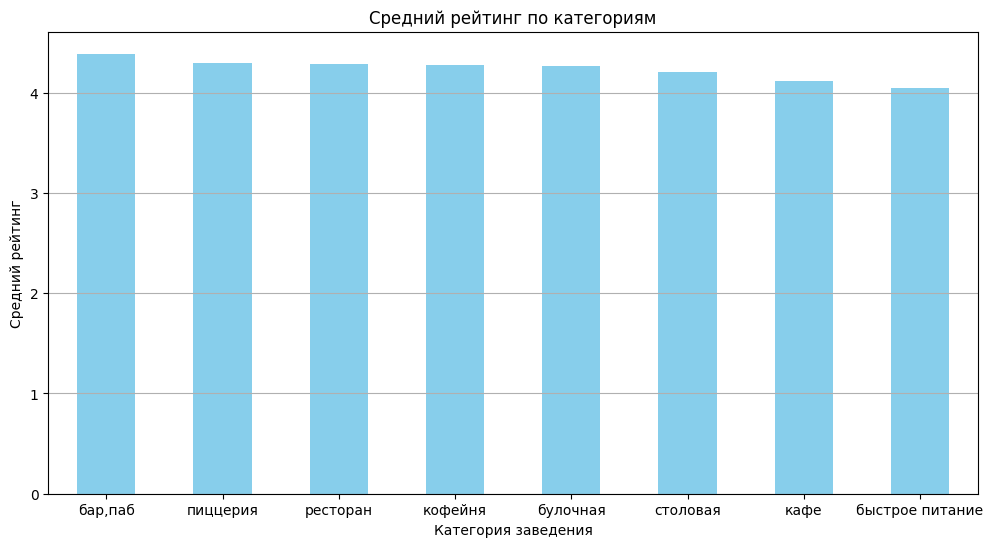

In [66]:
plt.figure(figsize=(12, 6))

rating_mean = round(df.groupby('category')['rating'].mean(), 2).sort_values(ascending=False)

rating_mean.plot(kind='bar',
                color='skyblue',
                legend=False,
                rot=0)

plt.grid(axis='y')
plt.title('Средний рейтинг по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')

plt.show

Средние рейтинги заведений общественного питания для разных категорий заведений различаются несильно. Все они лежат в границах от 4,05 до 4,39.

---

### Корреляция


Изучим с какими данными показывают самую сильную корреляцию рейтинги заведений.

In [67]:
correlation_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'rating']


,rating
price,0.220397
district,0.200699
category,0.189677
is_24_7,0.150365
chain,0.108114
seats,0.000000


<AxesSubplot:>

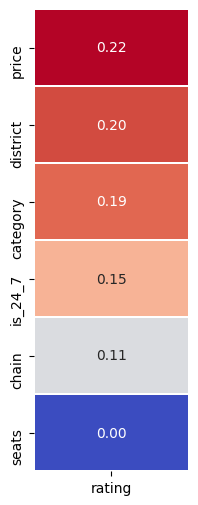

In [68]:
plt.figure(figsize=(2, 6))
heatmap_data = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(heatmap_data,
           annot=True,
           fmt='.2f',
           cmap='coolwarm',
           linewidth=0.5,
           cbar=False)

Между рейтингом и ценовой категорией наблюдается слабая положительная связь. Это самая сильная корреляция из имеющихся. Проверим эту связь. Посчитаем средние рейтинги для каждой ценовой категории.

In [69]:
round(df.groupby('price')['rating'].mean(), 2).sort_values(ascending=False)

price
высокие          4.44
выше среднего    4.39
средние          4.30
низкие           4.17
Name: rating, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

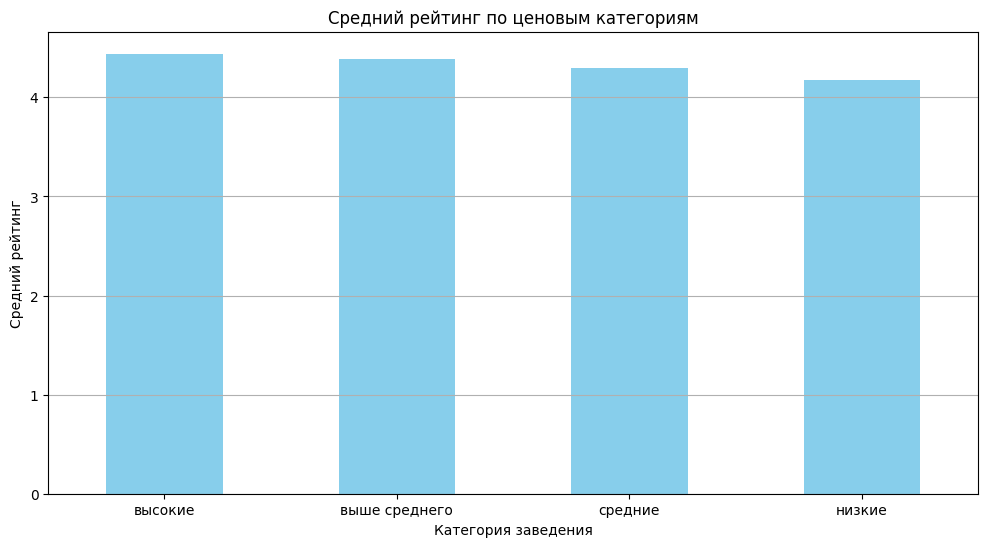

In [70]:
plt.figure(figsize=(12, 6))

rating_mean = round(df.groupby('price')['rating'].mean(), 2).sort_values(ascending=False)

rating_mean.plot(kind='bar',
                color='skyblue',
                legend=False,
                rot=0)

plt.grid(axis='y')
plt.title('Средний рейтинг по ценовым категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')

plt.show

Средний рейтинг снижается от 4,44 для категории с высокими ценами к 4,17 для категории с низкими ценами.

---

### Топ-15 популярных сетей.


Сгруппируем сетевые заведения по названию, посчитаем количество заведений в сети по убыванию и выведем 15 первых строк.

In [71]:
df[df['chain'] == 1].groupby('name')['id'].count().sort_values(ascending=False)

name
шоколадница            120
домино'с пицца          76
додо пицца              74
one price coffee        71
яндекс лавка            69
                      ... 
поминальная трапеза      1
диана                    1
прованс                  1
дастархан                1
1-я креветочная          1
Name: id, Length: 747, dtype: int64

Построим сводную таблицу, где строками будут служить названия заведений и их категории, а значениями количество заведений и средний рейтинг. Отсортируем таблицу по количеству заведений с одним названием.

In [72]:
pivot_name = pd.pivot_table(df[df['chain'] == 1], index=['name', 'category'], values=['id', 'rating'], aggfunc={'id': 'count', 'rating': 'mean'}).sort_values(by='id', ascending=False).head(15)
print(pivot_name.reset_index())


                                   name  category   id    rating
0                           шоколадница   кофейня  119  4.178151
1                        домино'с пицца  пиццерия   76  4.169737
2                            додо пицца  пиццерия   74  4.286486
3                      one price coffee   кофейня   71  4.064789
4                          яндекс лавка  ресторан   69  3.872464
5                                 cofix   кофейня   65  4.075385
6                                 prime  ресторан   49  4.114286
7                              кофепорт   кофейня   42  4.147619
8   кулинарная лавка братьев караваевых      кафе   39  4.394872
9                               теремок  ресторан   36  4.105556
10                             cofefest   кофейня   31  3.977419
11                              чайхана      кафе   26  3.946154
12                              буханка  булочная   25  4.416000
13                           drive café      кафе   24  4.025000
14                       

Количество заведений с названием шоколадница в группировке без учета категории отличается от количества в сводной таблице. Выведем уникальные названия категорий для заведение с названием "шоколадница".

In [73]:
df[df['name'] == 'шоколадница']['category'].value_counts()

кофейня    119
кафе         1
Name: category, dtype: int64

Категория одного кафе в этой сети ошибочна. Так данная ошибка не оказывает значительного влияния, ее можно оставить.

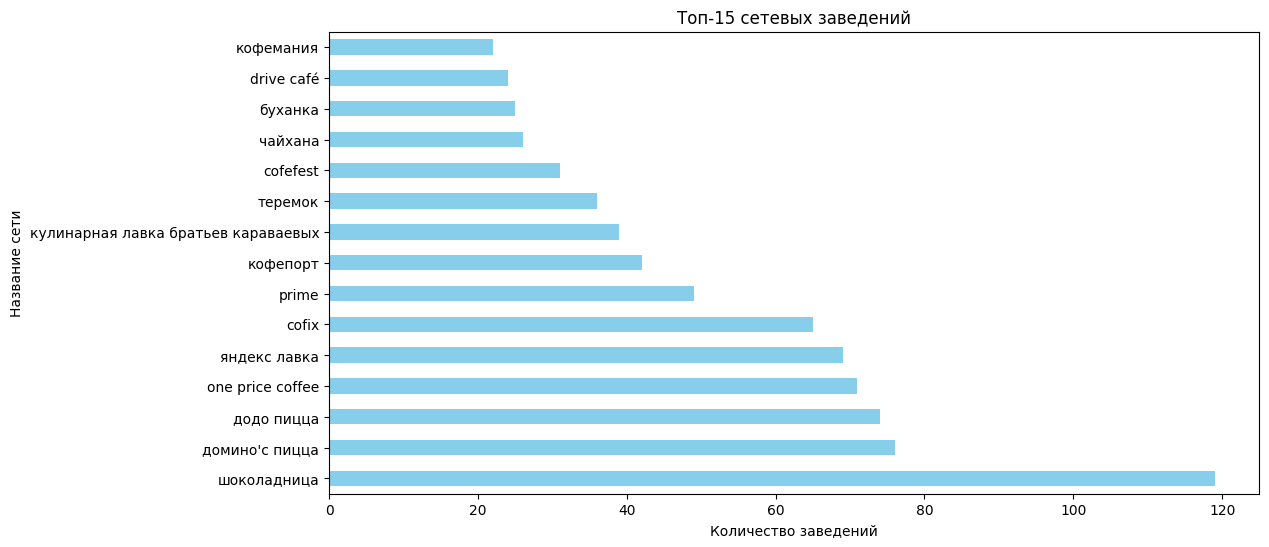

In [74]:
pivot_bar = pivot_name.reset_index()

pivot_bar.plot(kind='barh',
                y='id',
                x='name',
                figsize=(12,6),
                legend=False,
                color='skyblue'
)
plt.xlabel('Количество заведений')
plt.ylabel('Название сети')
plt.title('Топ-15 сетевых заведений')




plt.show()

Больше всего заведений в сети у кофейни "Шоколадница". Замыкает топ-15 сеть кофеен "Кофемания."

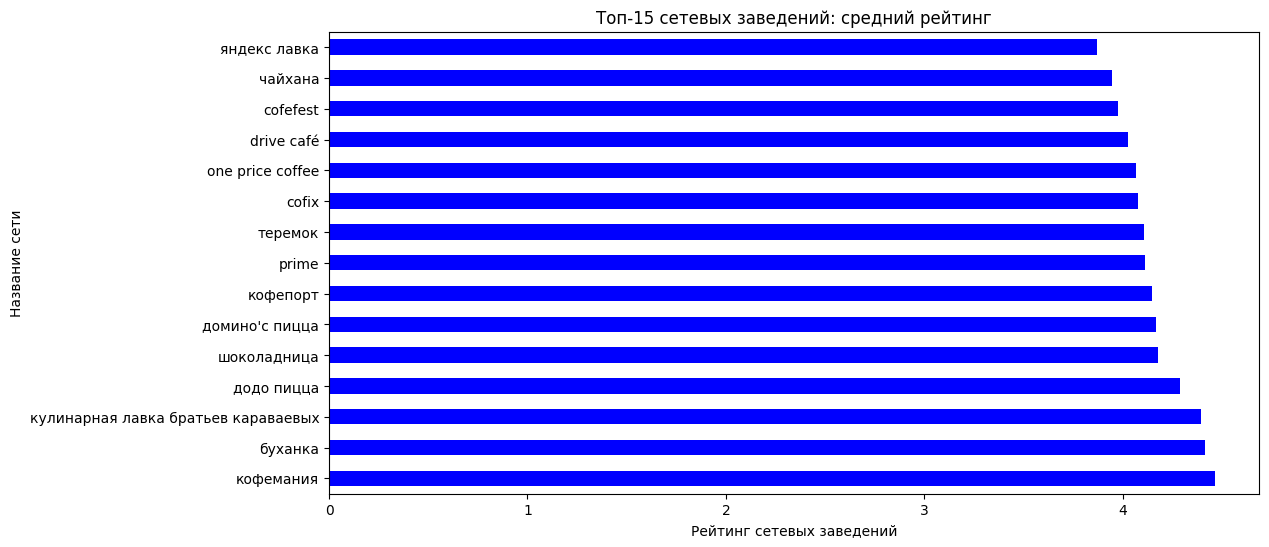

In [75]:
pivot_bar = pivot_name.reset_index()

pivot_bar.sort_values(by='rating', ascending=False).plot(kind='barh',
                y='rating',
                x='name',
                figsize=(12,6),
                legend=False,
                color='blue'
)
plt.xlabel('Рейтинг сетевых заведений')
plt.ylabel('Название сети')
plt.title('Топ-15 сетевых заведений: средний рейтинг')

plt.show()

Самый высокий рейтинг среди заведений из Топ-15 самый высокий рейтинг у сети кофеен "Кофемания".

---

### Средний чек


Изучим зависимость среднего чека заведения от округа Москвы.

In [76]:
round(df.groupby('district_abb').middle_avg_bill.mean(), 2).sort_values(ascending=False)

district_abb
ЦАО     1190.53
ЗАО     1053.23
САО      927.96
ЮАО      834.40
СЗАО     822.22
ВАО      820.63
ЮЗАО     792.56
СВАО     716.61
ЮВАО     654.10
Name: middle_avg_bill, dtype: float64

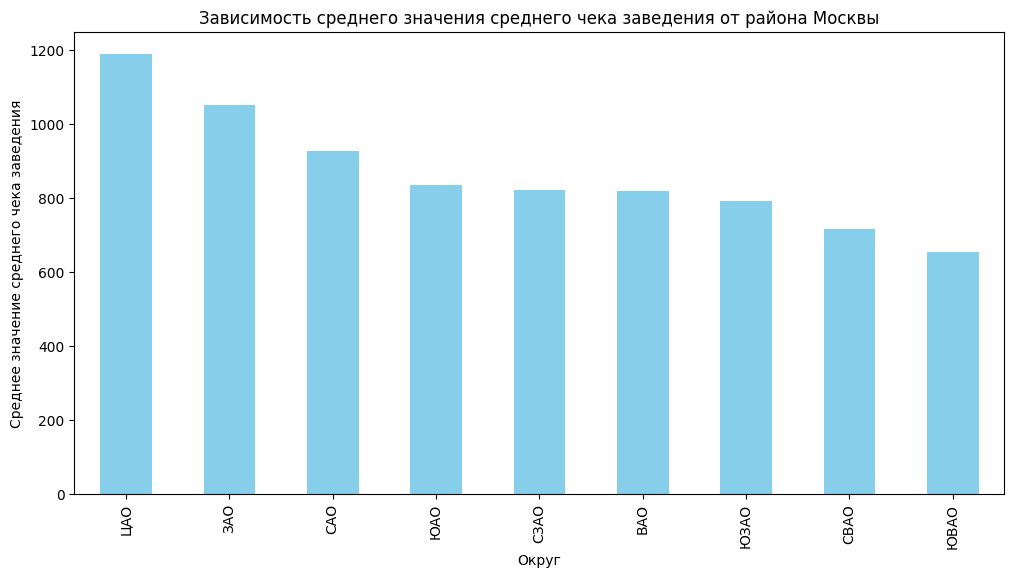

In [77]:
district_price=round(df.groupby('district_abb').middle_avg_bill.mean(), 2).sort_values(ascending=False)

district_price.plot(kind='bar',
                   color='skyblue',
                   figsize=(12,6),
                   legend=False
)

plt.xlabel('Округ')
plt.ylabel('Среднее значение среднего чека заведения')
plt.title('Зависимость среднего значения среднего чека заведения от района Москвы')

plt.show()

Средний чек в заведениях Центрального административного округа выше, чем в заведения других округов. Средний чек в Западном административном округе по значению ближе к значению для Центрального административного округа, чем к остальным округам.

Посчитаем медианные значения среднего чека по округам.

In [78]:
round(df.groupby('district_abb')['middle_avg_bill'].agg(['mean', 'median']), 2).sort_values(by='mean', ascending=False)

,mean,median
district_abb,,
ЦАО,1190.53,1000.0
ЗАО,1053.23,1000.0
САО,927.96,650.0
ЮАО,834.40,500.0
СЗАО,822.22,700.0
ВАО,820.63,575.0
ЮЗАО,792.56,600.0
СВАО,716.61,500.0
ЮВАО,654.10,450.0


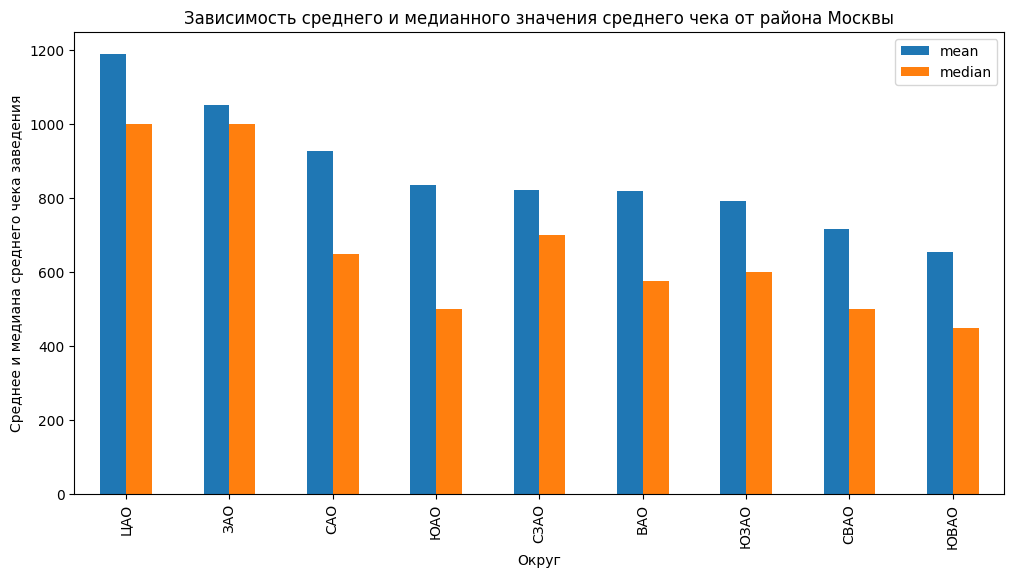

In [79]:
district_price_mean_med = round(df.groupby('district_abb')['middle_avg_bill'].agg(['mean', 'median']), 2).sort_values(by='mean', ascending=False)

district_price_mean_med.plot(kind='bar',
                   
                   figsize=(12,6),
                   legend=True
)

plt.xlabel('Округ')
plt.ylabel('Среднее и медиана среднего чека заведения')
plt.title('Зависимость среднего и медианного значения среднего чека от района Москвы')

plt.show()

Для всех округов Москвы среднее значение среднего чека заведения больше, чем медианное значение. Для ЗАО незначительно больше. Возможно в каждом округе есть небольшое количество заведений с очень высокими ценами. Или в данных есть аномальные значения.

---

### Промежуточный вывод


1. Самыми распространенными категориями заведений общепита являются "кафе" (2376), "ресторан" (2041), "кофейня" (1413).\
2. Среди всех округов по количеству заведений лидирует Центральной административном округ - 2241 заведения (26,67% от количества всех заведений Москвы). В Центральном административном округе самой распространенной категорией заведений является "ресторан" (669). Примерно половина всех пабов/баров Москвы расположены в ЦАО.\
3. 62% заведений в Москве несетевые. Самая высокая доля сетевых заведений в категории "булочная". Также высокая доля сетевых заведений в категориях "пиццерия" и "кофейня". Самая низкая доля сетевых заведений в категории "бар,паб".\
4. В столбце `seats` присутствуют аномальные значения. Кроме того, необходимо исследовать причины возникновения регулярных пиковых значений. Основное количество заведений имеет количество мест меньше 120. Количество посадочных мест, частота которых максимальна, лежат в диапазоне 30-50 посадочных мест. По количеству посадочных мест лидируют заведения с категорией "ресторан". Для некоторых категорий значения в столбце `seats` кажутся несколько завышенными.\
5. Средние рейтинги заведений общественного питания для разных категорий заведений различаются несильно. Все они лежат в границах от 4,05 до 4,39.\
6. Между рейтингом и ценовой категорией наблюдается слабая положительная связь: средний рейтинг снижается от 4,44 для категории с высокими ценами к 4,17 для категории с низкими ценами.\
7. В топ-15 сетевых заведений общепита по популярности лидирует кофейня "Шоколадница". Замыкает Tоп-15 - кофейня "Кофемания". При этом у сети кофеен "Кофемания" самый высокий рейтинг среди заведений из Топ-15.\
8. Средний чек в Центральном и Западном административных округах больше, чем в других округах Москвы. Медианные значения среднего чека выше, чем средние для всех округов Москвы.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

1. Были загружены и изучены данные двух датасетов:
`/datasets/rest_info.csv` - с информацией о заведениях общественного питания;
`/datasets/rest_price.csv` - с информацией о среднем чеке в заведениях общественного питания.
Данные проверены на корректность типов данных, пропуски и дубликаты.
2. Самыми распространенными категориями заведений общепита являются "кафе", "ресторан", "кофейня". Центральный административный округ лидирует по доле заведений, расположеных в нем. Самая популярная категория в ЦАО - ресторан. Средний чек также выше в ЦАО, чем в других округах. Несетевых заведений в Москве больше, чем сетевых. Самая высокая доля сетевых заведений в категории "булочная". Чаще всего заведения имеют 30-50 посадочных мест. Нет сильной зависимости рейтинга от категории заведения. Есть корреляция рейтинга и ценовой категории. Лидером по популярности является кофейня "Шоколадница". При этом самый высокий рейтинг из популярных заведений у кофейни "Кофемания".
3. Можно рассмотреть возможность открытия ресторана, бара/паба или кофейни в Центральном административном округе Москвы. Необходимо дальнейшее исследование данных по количеству посадочных мест. Также можно исследовать корреляцию рейтинга и ценовой категории, так как скорее всего данная корреляция не является зависимостью (возможно в заведениях более высокой ценовой категории еда вкуснее и рейтинг выше поэтому).